In [1]:
#
# This will be used to visualize the data taken by the Vemco Rx-Live Receiver 
# Data taken using Putty
#

In [4]:
# libraries
import numpy as np
import pandas as pd
import os
import os.path
import shutil
import csv
import math
import statistics
import time
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [52]:
df_list = []
allFiles = list(os.walk("./Long_Beach_6_29_2021"))  # Change name to specfic directory

for item in allFiles:
        foldername, LoDirs, LoFiles = item
#         print('Foldername: ' + foldername)
#         print(f'LoDirs: {LoDirs}')
#         print(f'LoFiles: {LoFiles}')

        count = 0
        for filename in LoFiles:
            if filename == "data_1.csv" or filename == 'data_2.csv' or filename == 'data_3.csv':
                path = os.getcwd() + "/Long_Beach_6_29_2021/" + filename 
                df = pd.read_csv(path, engine='python', header=0, index_col=False)
                df_list.append(df)

In [53]:
final_df = pd.concat(df_list)

In [54]:
pd.set_option('display.max_rows', 10)  # None for no limit; default: 10
pd.set_option('display.min_rows', 10)  # None for no limit; default: 10

# Let's view it
final_df

,Receiver Serial Number,Three-Digit Line-Counter,Date/Time,Transmitter Code-Space,Transmitter ID Number,Signal Level (dB),Noise-Level (dB),Zero,Channel,Distance (m),Sensor GPS Coords,Tag GPS Coords
0,457012,134,2021-06-29 19:01:15.507,A69-1602,65478,62.0,39.5,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
1,457012,135,2021-06-29 19:01:23.687,A69-1602,65478,66.0,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
2,457012,136,2021-06-29 19:01:40.050,A69-1602,65478,62.5,41.5,0,#89,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
3,457012,138,2021-06-29 19:02:04.591,A69-1602,65478,55.5,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
4,457012,139,2021-06-29 19:02:12.772,A69-1602,65478,54.5,40.0,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
...,...,...,...,...,...,...,...,...,...,...,...,...
105,457012,121,2021-06-29 18:57:10.107,A69-1602,65478,72.5,39.0,0,#90,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
106,457012,122,2021-06-29 18:57:18.285,A69-1602,65478,75.0,37.5,0,#A1,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
107,457012,123,2021-06-29 18:57:26.466,A69-1602,65478,76.5,38.0,0,#A4,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
108,457012,124,2021-06-29 18:57:34.645,A69-1602,65478,72.5,37.5,0,#A3,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"


In [55]:
#
# this df.info() call will show the different features (columns), their types, and how many non-null there are
#

final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Receiver Serial Number    220 non-null    int64  
 1   Three-Digit Line-Counter  220 non-null    int64  
 2   Date/Time                 220 non-null    object 
 3   Transmitter Code-Space    220 non-null    object 
 4   Transmitter ID Number     220 non-null    int64  
 5   Signal Level (dB)         220 non-null    float64
 6   Noise-Level (dB)          220 non-null    float64
 7   Zero                      220 non-null    int64  
 8   Channel                   220 non-null    object 
 9   Distance (m)              220 non-null    int64  
 10  Sensor GPS Coords         220 non-null    object 
 11  Tag GPS Coords            220 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 22.3+ KB


In [56]:
#final_df.columns = ["Receiver Serial Number", "Three-Digit Line-Counter", "Date/Time", "Transmitter Code-Space", "Transmitter ID Number", "Signal Level (dB)", "Noise-Level (dB)", "Channel", "Zero", "Distance (m)", "Sensor GPS Coords", "Tag GPS Coords"] 

In [57]:
df_clean = final_df.dropna()

In [58]:
df_clean

,Receiver Serial Number,Three-Digit Line-Counter,Date/Time,Transmitter Code-Space,Transmitter ID Number,Signal Level (dB),Noise-Level (dB),Zero,Channel,Distance (m),Sensor GPS Coords,Tag GPS Coords
0,457012,134,2021-06-29 19:01:15.507,A69-1602,65478,62.0,39.5,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
1,457012,135,2021-06-29 19:01:23.687,A69-1602,65478,66.0,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
2,457012,136,2021-06-29 19:01:40.050,A69-1602,65478,62.5,41.5,0,#89,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
3,457012,138,2021-06-29 19:02:04.591,A69-1602,65478,55.5,39.5,0,#9F,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
4,457012,139,2021-06-29 19:02:12.772,A69-1602,65478,54.5,40.0,0,#92,100,"(33.75219, -118.12743)","(33.75227, -118.12857)"
...,...,...,...,...,...,...,...,...,...,...,...,...
105,457012,121,2021-06-29 18:57:10.107,A69-1602,65478,72.5,39.0,0,#90,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
106,457012,122,2021-06-29 18:57:18.285,A69-1602,65478,75.0,37.5,0,#A1,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
107,457012,123,2021-06-29 18:57:26.466,A69-1602,65478,76.5,38.0,0,#A4,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"
108,457012,124,2021-06-29 18:57:34.645,A69-1602,65478,72.5,37.5,0,#A3,52,"(33.75222, -118.12803)","(33.75227, -118.12857)"


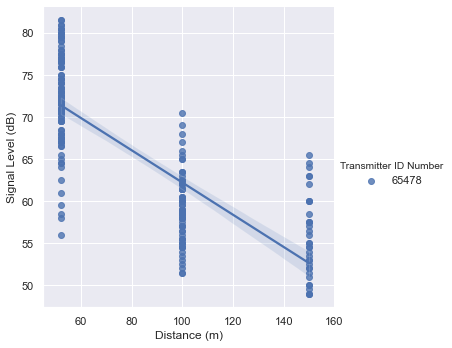

In [59]:
# Plot using Seaborn
sns.lmplot(x='Distance (m)', y='Signal Level (dB)', fit_reg=True, data=df_clean, hue='Transmitter ID Number')
 
# Tweak using Matplotlib
plt.ylim(None, None)
plt.xlim(45, 160)
plt.savefig("long_beach_signal_plot.png")

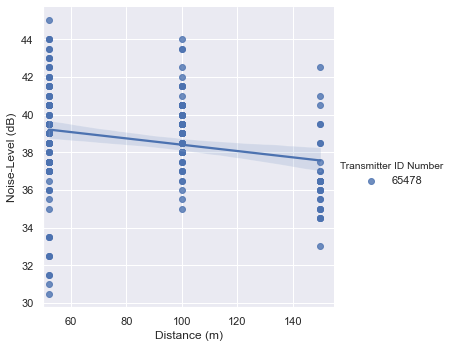

In [60]:
# Plot using Seaborn
sns.lmplot(x='Distance (m)', y='Noise-Level (dB)', fit_reg = True, data=df_clean, hue='Transmitter ID Number')
 
# Tweak using Matplotlib
plt.ylim(None, None)
plt.xlim(50, 155)
plt.savefig('long_beach_noise_plot.png')

In [61]:
##### To edit csvs and plot new histogram #####

There were 7 outliers at 50m.


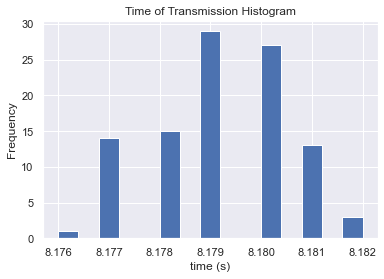

In [24]:
# path = os.getcwd() + "/Long_Beach_6_29_2021/data_1_calculated_error_values.csv"

# with open(path, "r") as f:
#     reader = csv.reader(f)
#     spamreader = csv.reader(f)
#     for row in spamreader:
#         print(row)
            
# df_to_change = pd.read_csv(path, engine='python', header=None, index_col=False)

# temp = df_to_change
# delta_t = []




# print(temp.values)
# for i in range(2, len(temp.values[0][0])):
#     print(temp.values[0][0][i])
#     if temp.values[0][0][i] < 12:
#        delta_t.append(temp.values[0][0][i])      

# delta_t

total_data = []

### EVERYTHING ABOVE IS GARBAGE UNTILL CSV IS FIXED

data1 = [8.179, 8.177, 8.179, 8.181, 8.18, 8.177, 8.179, 8.179, 8.179, 8.177, 8.178, 8.179, 8.182, 8.181, 8.181, 16.36, 8.179, 16.355, 8.179, 8.178, 8.179, 8.177, 8.179, 8.18, 8.18, 8.18, 8.18, 8.18, 8.181, 8.18, 8.18, 8.179, 16.359, 8.178, 8.178, 8.178, 8.178, 8.177, 8.178, 8.18, 8.181, 8.18, 8.179, 8.18, 8.18, 8.179, 8.179, 8.18, 8.179, 8.181, 8.179, 8.18, 8.179, 8.179, 8.18, 8.178, 16.356, 8.177, 8.177, 8.182, 8.18, 8.18, 8.181, 8.181, 16.359, 8.18, 8.179, 8.179, 8.177, 8.176, 8.177, 8.177, 8.178, 8.178, 8.18, 8.181, 8.18, 8.18, 8.18, 8.178, 16.356, 8.18, 8.18, 8.182, 8.18, 8.179, 8.178, 8.177, 8.179, 8.179, 16.363, 8.179, 8.179, 8.178, 8.177, 8.177, 8.177, 8.178, 8.179, 8.18, 8.181, 8.179, 8.181, 8.181, 8.18, 8.178, 8.181, 8.179, 8.179]
new_data1 = []
count = 0

for num in data1:
    if num < 10:
        new_data1.append(num)
    else:
        count += 1

total_data += new_data1 
print(f"There were {count} outliers at 50m.")
delta_t_np1 = np.array(new_data1)

NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np1, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("data_1_no_outliers" + "_histogram.png")
plt.show()


There were 20 outliers at 100m.


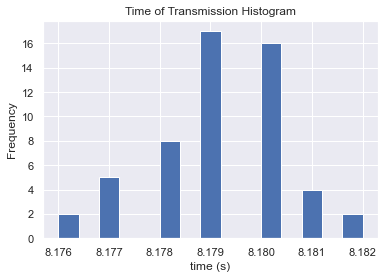

In [25]:
data2 = [8.18, 16.363, 24.541, 8.181, 8.179, 8.18, 8.179, 8.179, 8.18, 8.179, 8.18, 8.182, 8.176, 8.179, 8.18, 8.178, 8.179, 8.18, 8.18, 8.18, 8.177, 8.177, 32.715, 16.358, 8.177, 8.179, 8.179, 16.356, 32.713, 16.361, 32.72, 8.182, 32.722, 8.178, 8.18, 8.178, 8.178, 8.178, 8.176, 8.178, 8.177, 8.178, 8.178, 8.179, 16.359, 8.181, 8.177, 8.179, 8.18, 32.719, 8.181, 8.18, 24.539, 8.18, 16.356, 24.529, 32.72, 8.179, 8.18, 16.361, 8.179, 8.179, 16.36, 8.18, 8.179, 8.179, 8.181, 16.359, 16.36, 16.36, 8.179, 8.18, 8.18, 8.179]
new_data2 = []
count = 0

for num in data2:
    if num < 10:
        new_data2.append(num)
    else:
        count += 1

total_data += new_data2 
print(f"There were {count} outliers at 100m.")

delta_t_np2 = np.array(new_data2)

NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np2, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("data_2_no_outliers" + "_histogram.png")
plt.show()

There were 19 outliers at 150m.


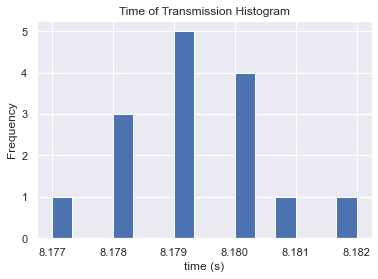

In [26]:
data3 = [8.177, 8.178, 8.18, 8.178, 8.178, 16.355, 8.179, 8.18, 73.618, 16.361, 49.078, 8.179, 8.179, 89.968, 16.36, 8.179, 8.18, 16.36, 49.074, 40.882, 40.903, 8.18, 49.082, 8.181, 40.891, 16.354, 16.356, 8.179, 24.535, 24.537, 24.538, 8.182, 16.36, 32.72]
new_data3 = []

count = 0

for num in data3:
    if num < 10:
        new_data3.append(num)
    else:
        count += 1
        
total_data += new_data3 
print(f"There were {count} outliers at 150m.")
        
delta_t_np3 = np.array(new_data3)

NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np3, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("data_3_no_outliers" + "_histogram.png")
plt.show()

The total avg is 8.179152046783626


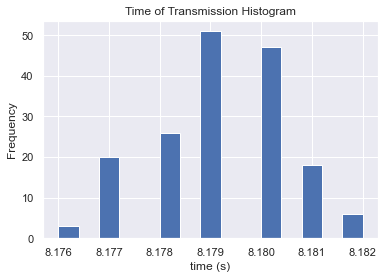

In [39]:
print(f"The total avg is {statistics.mean(total_data)}")
delta_t_np_tot = np.array(total_data)
NUM_OF_BINS = 15 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_tot, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("all_data_no_outliers_histogram.png")
plt.show()

In [ ]:
#################################################
############ CREATING TOF HISTOGRAMS ############
#################################################

In [6]:
t_mean_6 = statistics.mean([8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.178, 8.18])
t_mean_35 = statistics.mean([8.179, 16.358, 24.537, 32.716, 40.896, 49.074, 57.253, 65.432, 73.611, 81.79, 89.96900000000001, 98.149, 106.328, 114.507])

print(f"The t_mean_6 is {t_mean_6}")
print(f"The t_mean_35 is {t_mean_35}")

The t_mean_6 is 8.179214285714286
The t_mean_35 is 61.34278571428572


The total avg is 0.00024025974025939948
(array([4., 0., 3., 1., 2., 1., 2., 0., 2., 0., 2., 1., 1., 0., 0., 0., 2.,
       0., 0., 1.]), array([0.00000000e+00, 3.57142857e-05, 7.14285714e-05, 1.07142857e-04,
       1.42857143e-04, 1.78571429e-04, 2.14285714e-04, 2.50000000e-04,
       2.85714286e-04, 3.21428571e-04, 3.57142857e-04, 3.92857143e-04,
       4.28571429e-04, 4.64285714e-04, 5.00000000e-04, 5.35714286e-04,
       5.71428571e-04, 6.07142857e-04, 6.42857143e-04, 6.78571429e-04,
       7.14285714e-04]), <BarContainer object of 20 artists>)


AttributeError: 'tuple' object has no attribute 'title'

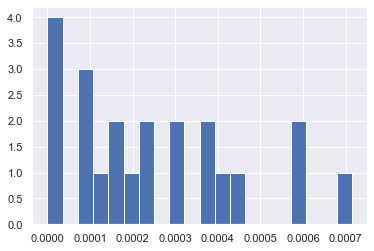

In [12]:
tof_6_35_1d = [] 
data_at_6 = [8.179, 16.358, 24.537, 32.717, 40.896, 49.075, 57.254000000000005, 65.434, 73.613, 81.792, 89.971, 98.15100000000001, 106.32900000000001, 114.50900000000001]
data_at_35 = [8.179, 16.358, 24.537, 32.716, 40.896, 49.074, 57.253, 65.432, 73.611, 81.79, 89.96900000000001, 98.149, 106.328, 114.507]

for i in range(len(data_at_6)):
    for j in range(len(data_at_35)):
        tof = (data_at_35[j] - data_at_6[i]) % t_mean_6
        if tof < 1:
            tof_6_35_1d.append((data_at_35[j] - data_at_6[i]) % t_mean_6) 
        # tof_0_100_2d[i][j] = new_data2[j] - data_at_0[i]

print(f"The total avg is {statistics.mean(tof_6_35_1d)}")
delta_t_np_error = np.array(tof_6_35_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points

some_plot = plt.hist(delta_t_np_error, NUM_OF_BINS)
print(some_plot)
some_plot.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_histogram.png")
plt.show()
        

In [8]:
0.003076923076925471 * 1500

4.615384615388206

The total avg is 0.5973588157976426


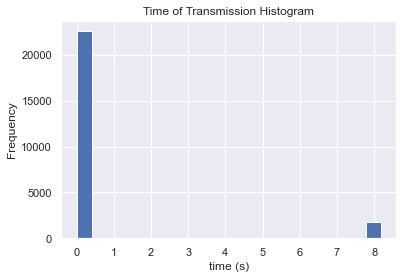

In [69]:
tof_0_100_1d = []

for i in range(len(data_at_0)):
    for j in range(len(data_at_100)):
        tof = (data_at_100[j] - data_at_0[i]) % t_mean_0
        tof_0_100_1d.append(tof) 
        # tof_0_100_2d[i][j] = new_data2[j] - data_at_0[i]

print(f"The total avg is {statistics.mean(tof_0_100_1d)}")
delta_t_np_error = np.array(tof_0_100_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_error, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_histogram.png")
plt.show()
        

In [2]:
tof_0_100_1d = []

for i in range(len(data_at_0)):
    for j in range(len(data_at_100)):
        tof = (data_at_100[j] - data_at_0[i]) % t_mean_0
        if tof > 1:
            tof_0_100_1d.append(tof - t_mean_0)
        else:
            tof_0_100_1d.append(tof) 

print(f"The total avg is {statistics.mean(tof_0_100_1d)}")
delta_t_np_error = np.array(tof_0_100_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_error, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_histogram.png")
plt.show()
        

NameError: name 'data_at_0' is not defined

In [1]:
tof_0_100_1d = []
data_at_50 = [8.179, 16.358, 24.535, 32.714, 40.894999999999996, 49.074999999999996, 57.251999999999995, 65.431, 73.61, 81.789, 89.96600000000001, 98.144, 106.32300000000001, 114.50500000000001, 122.686, 130.86700000000002, 147.22700000000003, 155.40600000000003, 171.76100000000002, 179.94000000000003, 188.11800000000002, 196.29700000000003, 204.47400000000002, 212.65300000000002, 220.83300000000003, 229.01300000000003, 237.19300000000004, 245.37300000000005, 253.55300000000005, 261.73400000000004, 269.91400000000004, 278.09400000000005, 286.273, 302.632, 310.81, 318.988, 327.166, 335.344, 343.521, 351.699, 359.879, 368.06, 376.24, 384.419, 392.599, 400.779, 408.95799999999997, 417.13699999999994, 425.31699999999995, 433.4959999999999, 441.6769999999999, 449.8559999999999, 458.0359999999999, 466.21499999999986, 474.39399999999983, 482.57399999999984, 490.75199999999984, 507.10799999999983, 515.2849999999999, 523.4619999999999, 531.6439999999999, 539.8239999999998, 548.0039999999998, 556.1849999999998, 564.3659999999999, 580.7249999999999, 588.9049999999999, 597.0839999999998, 605.2629999999998, 613.4399999999998, 621.6159999999999, 629.7929999999999, 637.9699999999999, 646.1479999999999, 654.3259999999999, 662.5059999999999, 670.6869999999999, 678.8669999999998, 687.0469999999998, 695.2269999999997, 703.4049999999997, 719.7609999999997, 727.9409999999997, 736.1209999999996, 744.3029999999997, 752.4829999999996, 760.6619999999996, 768.8399999999996, 777.0169999999996, 785.1959999999996, 793.3749999999995, 809.7379999999996, 817.9169999999996, 826.0959999999995, 834.2739999999995, 842.4509999999996, 850.6279999999996, 858.8049999999996, 866.9829999999996, 875.1619999999996, 883.3419999999995, 891.5229999999996, 899.7019999999995, 907.8829999999996, 916.0639999999996, 924.2439999999996, 932.4219999999996, 940.6029999999996, 948.7819999999996]

for i in range(len(data_at_50)):
    for j in range(len(data_at_100)):
        tof = (data_at_100[j] - data_at_50[i]) % t_mean_50
            
        if tof > 1:
            tof_0_100_1d.append(tof - t_mean_50)
        else:
            tof_0_100_1d.append(tof) 

print(f"The total avg is {statistics.mean(tof_0_100_1d)}")
delta_t_np_error = np.array(tof_0_100_1d)
NUM_OF_BINS = 20 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_np_error, NUM_OF_BINS)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_50_100_histogram.png")
plt.show()
        

NameError: name 'data_at_100' is not defined

In [72]:
SOS = 1500 #m/s
print(f"The distance is approximately {statistics.mean(tof_0_100_1d) * 1500}.")

The distance is approximately 11.633656448253772.


In [87]:
(1161.465 % 8.179) * 1500

70.4999999998197

In [ ]:
############ Testing Directory Stuff ############

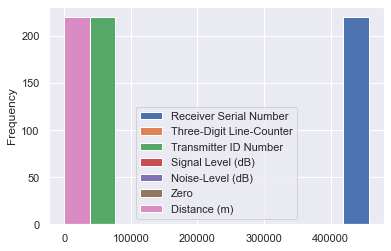

In [31]:
AllFiles = list(os.walk("./Long_Beach_6_29_2021"))  #Walks everything inside current directory

df_list = []

for item in AllFiles:
    #print("item is", item, "\n")    
    foldername, LoDirs, LoFiles = item 

    for filename in LoFiles:
        if filename[-3:] == "csv" and (len(filename) == 10 or len(filename) == 11):    
            path = os.getcwd() + foldername[1:] + "/" + filename 
            df = pd.read_csv(path, engine='python', header=0, index_col=False)
            df_list.append(df)

final_df = pd.concat(df_list)
ax = final_df.plot.hist(bins=12)

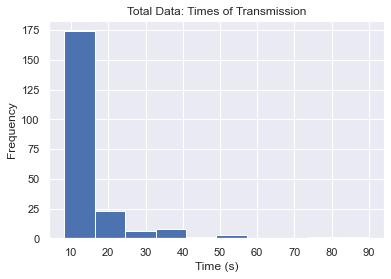

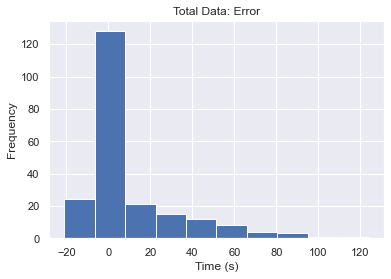

In [73]:
AllFiles = list(os.walk("./Long_Beach_6_29_2021"))  #Walks everything inside current directory

delta_t_values = np.array([])
error_values = np.array([])

for item in AllFiles:
    #print("item is", item, "\n")    
    foldername, LoDirs, LoFiles = item 

    for filename in LoFiles:
        if filename[-3:] == "csv" and "calculated_error" in filename:  
            path = os.getcwd() + foldername[1:] + "/" + filename 
            df = pd.read_csv(path, engine='python', header=None, index_col=False)
            delta_t_values = np.concatenate((delta_t_values, df.values[0][1:]))
            error_values = np.concatenate((error_values, df.values[3][1:]))

NUM_OF_BINS = 10 # Anywhere from 5-20 with 20 being with at least 1000 data points
plt.hist(delta_t_values, NUM_OF_BINS)
plt.title("Total Data: Times of Transmission")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_total_histogram.png")
plt.show()

plt.hist(error_values, NUM_OF_BINS)
plt.title("Total Data: Error")
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.savefig("error_total_histogram.png")
plt.show()

In [75]:
foldername = input("What do you want to name the folder?: ")
os.mkdir(os.path.join(".", foldername))
path = os.path.join(".", foldername)

os.mkdir(os.path.join(path, "calculated_error_data"))
os.mkdir(os.path.join(path, "delta_t_histograms"))
os.mkdir(os.path.join(path, "noise_plots"))
os.mkdir(os.path.join(path, "raw_data"))
os.mkdir(os.path.join(path, "signal_plots"))
os.mkdir(os.path.join(path, "summaries"))
os.mkdir(os.path.join(path, "time_of_flight_histograms"))



What do you want to name the folder?: test


In [77]:
print(path)

./test


In [82]:
AllFiles = list(os.walk("."))  #Walks everything inside current directory

foldername, LoDirs, LoFiles = AllFiles[0]


for filename in LoFiles:
    if filename[-3:] == "csv" and "calculated_error" in filename:
        shutil.move(filename, os.path.join(path, "calculated_error_data"))
        
    elif filename[-3:] == "png" and "histogram" in filename:
        if "data" in filename:
            shutil.move(filename, os.path.join(path, "delta_t_histograms"))
        else:
            shutil.move(filename, os.path.join(path, "time_of_flight_histograms"))
            
    elif filename[-3:] == "csv" and "summaries" in filename:
        shutil.move(filename, os.path.join(path, "summaries"))
        
    elif filename[-3:] == "png" and "noise" in filename:
        shutil.move(filename, os.path.join(path, "noise_plots"))
        
    elif filename[-3:] == "png" and "signal" in filename:
        shutil.move(filename, os.path.join(path, "signal_plots"))
    
    elif filename[-3:] == "csv" and (len(filename) == 10 or len(filename) == 11):
        shutil.move(filename, os.path.join(path, "raw_data"))


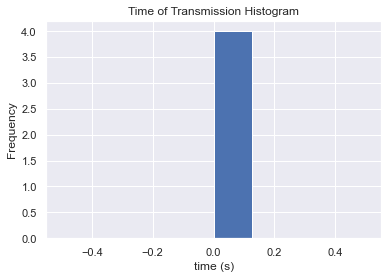

0.0012719780219718074


In [51]:
df = pd.read_csv("." + "/Roberts_Pool_7_8_2021/raw_data/data_1.csv", engine='python', header=0, index_col=False)
df2 = pd.read_csv("." + "/Roberts_Pool_7_8_2021/raw_data/data_2.csv", engine='python', header=0, index_col=False)

data_list_6 = df.values
data_list_35 = df2.values
difference_list = []
data_at_6 = [8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.179, 8.179, 8.179, 8.18, 8.178, 8.18]
avg = statistics.mean(data_at_6)

for i in range(1, len(df.values)):
    for j in range(1, len(df2.values)):
        past_datetime = datetime.datetime.strptime(data_list_6[i][2], '%Y-%m-%d %H:%M:%S.%f')
        current_datatime = datetime.datetime.strptime(data_list_35[j][2], '%Y-%m-%d %H:%M:%S.%f')
        difference = (current_datatime - past_datetime).total_seconds()
        difference_list.append(difference % avg)


plt.hist(delta_t_np_error, 8)
plt.title("Time of Transmission Histogram")
plt.xlabel("time (s)")
plt.ylabel("Frequency")
plt.savefig("time_of_flight_6_8_histogram.png")
plt.show()

mean = statistics.mean(difference_list)

print(mean)

In [39]:
0.01499999999996736 * 1500    # Supposed to be ~29

22.49999999995104

In [41]:
0.0012719780219718074 * 1500   # Supposed to be ~2

1.9079670329577112

In [43]:
0.0032166666666509735 * 1500   # Supposed to be ~6

4.82499999997646

In [45]:
0.005714285714264131 * 1500  # Supposed to be ~14

8.571428571396197

In [15]:
########### Testing for Roberts Pool 7/13/2021 ###########

In [18]:
df = pd.read_csv("." + "/Roberts_Pool_07_13_2021/raw_data/data_1.csv", engine='python', header=0, index_col=False)

In [23]:
print("The predicted distance of data_1 (should be 0) is: ", statistics.mean(df["Predicted Distance (m)"]))

The predicted distance of data_1 (should be 0) is:  1.8488372092977687


In [24]:
df = pd.read_csv("." + "/Roberts_Pool_07_13_2021/raw_data/data_2.csv", engine='python', header=0, index_col=False)

In [25]:
print("The predicted distance of data_2 (should be 10) is: ", statistics.mean(df["Predicted Distance (m)"]))

The predicted distance of data_2 (should be 10) is:  2.307692307685563


In [26]:
df = pd.read_csv("." + "/Roberts_Pool_07_13_2021/raw_data/data_3.csv", engine='python', header=0, index_col=False)

In [27]:
print("The predicted distance of data_3 (should be 20) is: ", statistics.mean(df["Predicted Distance (m)"]))

The predicted distance of data_3 (should be 20) is:  4.041666666657839


In [28]:
df = pd.read_csv("." + "/Roberts_Pool_07_13_2021/raw_data/data_4.csv", engine='python', header=0, index_col=False)

In [30]:
print("The predicted distance of data_4 (should be 30) is: ", statistics.mean(df["Predicted Distance (m)"]))

The predicted distance of data_4 (should be 30) is:  2.3289473684125395


In [32]:
df = pd.read_csv("." + "/Roberts_Pool_07_13_2021/raw_data/data_5.csv", engine='python', header=0, index_col=False)

In [33]:
print("The predicted distance of data_5 (should be 40) is: ", statistics.mean(df["Predicted Distance (m)"]))

The predicted distance of data_5 (should be 40) is:  2.7162162162113264


In [34]:
delta_t_avg = statistics.mean([8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.18,8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.18,8.179,8.179,8.179,8.178,8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.18,8.179,8.179,8.179,8.179,8.179,8.179,8.179,8.18,8.179,8.179])
rt_0 = [8.179,16.358,24.537,32.716,40.895,49.074000000000005,57.25300000000001,65.433,73.61200000000001,81.79100000000001,89.97000000000001,98.14900000000002,106.32800000000002,114.50700000000002,122.68600000000002,130.865,139.044,147.223,155.40300000000002,163.58200000000002,171.76100000000002,179.94000000000003,188.11800000000002,196.29700000000003,204.47600000000003,212.65500000000003,220.83400000000003,229.01300000000003,237.19200000000004,245.37100000000004,253.55000000000004,261.73,269.909,278.08799999999997,286.26699999999994,294.4459999999999,302.6249999999999,310.80399999999986,318.98299999999983,327.16299999999984,335.3419999999998,343.5209999999998]
rt_10 = [8.179,16.358,24.537,32.716,40.896,49.074,57.254,65.43299999999999,73.612,81.791,89.97,98.149,106.328,114.507,122.686,130.865,139.044,147.223,155.40200000000002,163.58100000000002,171.76100000000002,179.94000000000003,188.11900000000003,196.29800000000003,204.47700000000003,212.65600000000003,220.83500000000004,229.01400000000004,237.19300000000004,245.37300000000005,253.55200000000005,261.73100000000005,269.91,278.089,286.268,294.44699999999995,302.6259999999999,310.8049999999999]

8.17907142857143
the avg is:  0.0007001050420420143


(array([154., 207., 209., 202., 165., 127.,  83.,  51.,  20.,   6.]),
 array([0.        , 0.00020714, 0.00041429, 0.00062143, 0.00082857,
        0.00103571, 0.00124286, 0.00145   , 0.00165714, 0.00186429,
        0.00207143]),
 <BarContainer object of 10 artists>)

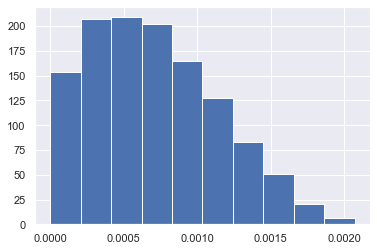

In [53]:
tot_val = []
for value in rt_10:
    for other_value in rt_0:
        diff = (value - other_value) % delta_t_avg
        
        if diff < 8:
            tot_val.append((value - other_value) % delta_t_avg)
        
print(delta_t_avg)
print("the avg is: ", statistics.mean(tot_val))
#print(tot_val)
plt.hist(tot_val, 10)

In [42]:
############# Testing what is wrong with the darn code #############

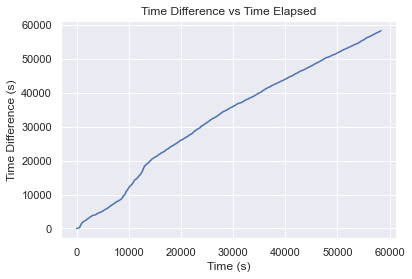

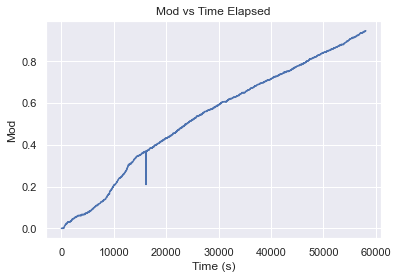

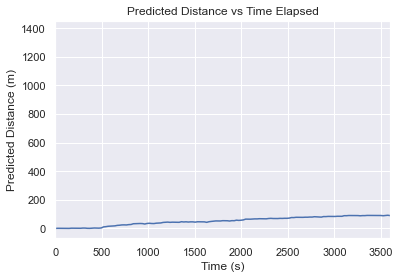

The predicted dist per ping is:  0.5860432569930233
The predicted dist per ping is:  0.02367587849280499


In [102]:
AllFiles = list(os.walk("./Overnight_Test/"))
path, LoDir, LoFiles = AllFiles[4]

# LoFiles = [LoFiles[2], LoFiles[0], LoFiles[1], LoFiles[3], LoFiles[4]]
time_zero = "2021-07-14 16:48:33.568"
timestamp_0 = datetime.datetime.strptime(time_zero, '%Y-%m-%d %H:%M:%S.%f')

time_diffs = []
distances = []
num_ticks = []

for file in LoFiles:
    csv_path = path + "/" + file
    df = pd.read_csv(csv_path, engine='python', header=0, index_col=False)
    num_ticks.append(len(df["Distance (m)"]))
    distances.append(df["Distance (m)"][0])
    
    for current_datetime in df["Date/Time"]:
        timestamp_x = datetime.datetime.strptime(current_datetime, '%Y-%m-%d %H:%M:%S.%f')
        time_diffs.append((timestamp_x - timestamp_0).total_seconds())


distances.append(58367)            
x_plot = []

for i in range(0, len(distances)-1):
    x_plot.append(np.linspace(distances[i], distances[i+1], num_ticks[i]))
    
x_plot = np.concatenate(x_plot)

plt.plot(x_plot, time_diffs) 
plt.title("Time Difference vs Time Elapsed")
plt.xlabel("Time (s)")
plt.ylabel("Time Difference (s)")
plt.show()

N = [i/8.17907142857143 for i in time_diffs]
m = [i%8.17907142857143 for i in time_diffs]

value_list = []

for value in m:
    if value < 1:
        value_list.append(value)
    else:
        pass
        #value_list.append(8.17907142857143 - value)

m = value_list
x_plot = x_plot[:(len(x_plot) -11)]
multiplied = [i * 1460 for i in m]


# plt.plot(x_plot, N) 
# plt.title("N vs Distance")
# plt.xlabel("Distance (m)")
# plt.ylabel("N")
# plt.show()

plt.plot(x_plot, m) 
plt.title("Mod vs Time Elapsed")
plt.xlabel("Time (s)")
plt.ylabel("Mod")
#plt.xlim([0,3])
plt.show()

plt.plot(x_plot, multiplied) 
plt.title("Predicted Distance vs Time Elapsed")
plt.xlabel("Time (s)")
plt.ylabel("Predicted Distance (m)")
plt.xlim([0,3600])
plt.show()


predicted_dist_per_ping = multiplied[-1] / len(m)
print("The predicted dist per ping is: ", predicted_dist_per_ping)

predicted_dist_per_sec = multiplied[-1] / 58367
print("The predicted dist per ping is: ", predicted_dist_per_sec)

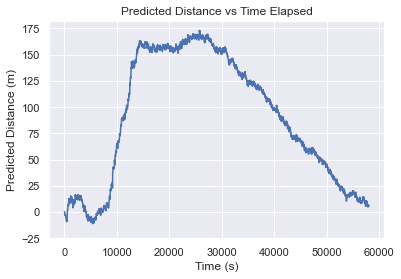

In [74]:
predicted_dist_per_sec = 0.02367587849280499
z = multiplied - (x_plot*(predicted_dist_per_sec))

index = 655

a = [z[:index],z[index+1:]]
stacked = np.hstack(a)
x_plot = x_plot[:-1]

plt.plot(x_plot, stacked) 
plt.title("Predicted Distance vs Time Elapsed")
plt.xlabel("Time (s)")
plt.ylabel("Predicted Distance (m)")
plt.ylim([-25,None])
plt.show()

# for i in z:
#     if i < -25:
#         z = list(z)
#         index = z.index(i)
#         print(index)



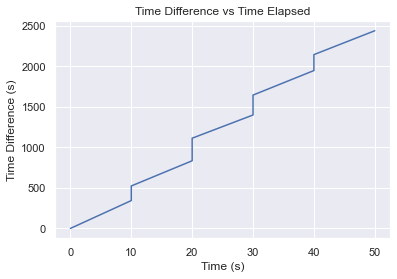

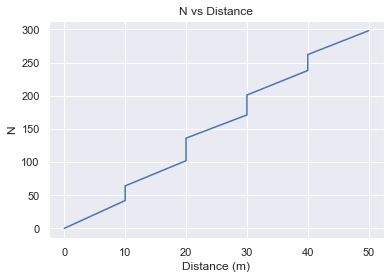

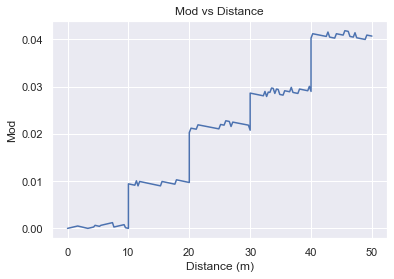

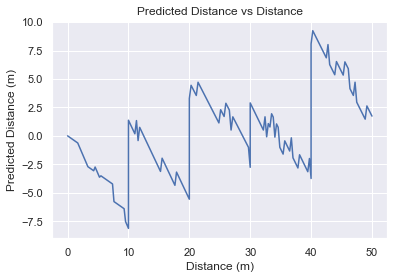

In [101]:
AllFiles = list(os.walk("./Roberts_Pool_07_13_2021/"))
path, LoDir, LoFiles = AllFiles[4]

LoFiles = [LoFiles[2], LoFiles[0], LoFiles[1], LoFiles[3], LoFiles[4]]

time_zero = "2021-07-08 23:56:45.626"
timestamp_0 = datetime.datetime.strptime(time_zero, '%Y-%m-%d %H:%M:%S.%f')

time_diffs = []
distances = []
num_ticks = []

for file in LoFiles:
    csv_path = path + "/" + file
    df = pd.read_csv(csv_path, engine='python', header=0, index_col=False)
    num_ticks.append(len(df["Distance (m)"]))
    distances.append(df["Distance (m)"][0])
    
    for current_datetime in df["Date/Time"]:
        timestamp_x = datetime.datetime.strptime(current_datetime, '%Y-%m-%d %H:%M:%S.%f')
        time_diffs.append((timestamp_x - timestamp_0).total_seconds())

distances.append(50)            
x_plot = []

for i in range(0, len(distances)-1):
    x_plot.append(np.linspace(distances[i], distances[i+1], num_ticks[i]))
    
x_plot = np.concatenate(x_plot)

plt.plot(x_plot, time_diffs) 
plt.title("Time Difference vs Time Elapsed")
plt.xlabel("Time (s)")
plt.ylabel("Time Difference (s)")
plt.show()

N = [i/8.17907142857143 for i in time_diffs]
m = [i%8.17907142857143 for i in time_diffs]

value_list = []

for value in m:
    if value < 8:
        value_list.append(value)
    else:
        value_list.append(8.17907142857143 - value)


m = value_list


multiplied = [i * 1460 for i in m]


plt.plot(x_plot, N) 
plt.title("N vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("N")
plt.show()

plt.plot(x_plot, m) 
plt.title("Mod vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Mod")
#plt.xlim([0,3])
plt.show()

# predicted_dist_per_sec = 0.02367587849280499

# time_diffs_changed = [i * predicted_dist_per_sec for i in time_diffs]
# z = [a - b for a, b in zip(multiplied, time_diffs_changed)]

plt.plot(x_plot, z) 
plt.title("Predicted Distance vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Predicted Distance (m)")
#plt.xlim([0,3])
plt.show()


# predicted_dist_per_ping = multiplied[-1] / len(m)
# print("The predicted dist per ping is: ", predicted_dist_per_ping)

# predicted_dist_per_sec = multiplied[-1] / 58367
# print("The predicted dist per ping is: ", predicted_dist_per_sec)

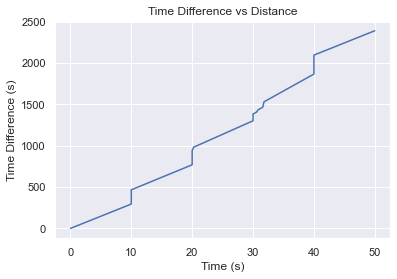

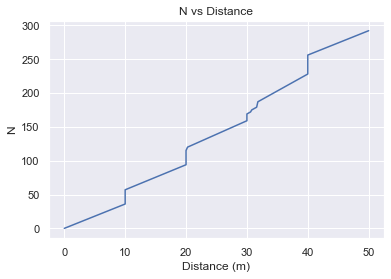

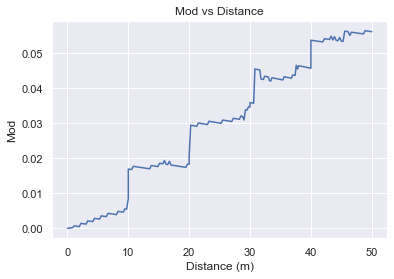

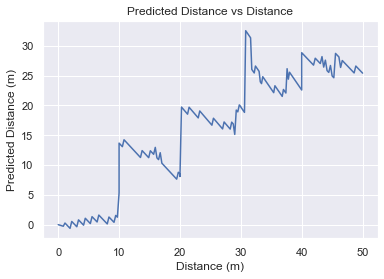

In [13]:
AllFiles = list(os.walk("./Roberts_Pool_07_15_2021/"))
path, LoDir, LoFiles = AllFiles[4]

#LoFiles = [LoFiles[2], LoFiles[0], LoFiles[1], LoFiles[3], LoFiles[4]]

time_zero = "2021-07-15 09:51:07.967"
timestamp_0 = datetime.datetime.strptime(time_zero, '%Y-%m-%d %H:%M:%S.%f')

time_diffs = []
distances = []
num_ticks = []

for file in LoFiles:
    csv_path = path + "/" + file
    df = pd.read_csv(csv_path, engine='python', header=0, index_col=False)
    num_ticks.append(len(df["Distance (m)"]))
    distances.append(df["Distance (m)"][0])
    
    for current_datetime in df["Date/Time"]:
        timestamp_x = datetime.datetime.strptime(current_datetime, '%Y-%m-%d %H:%M:%S.%f')
        time_diffs.append((timestamp_x - timestamp_0).total_seconds())

distances.append(50)            
x_plot = []

for i in range(0, len(distances)-1):
    x_plot.append(np.linspace(distances[i], distances[i+1], num_ticks[i]))
    
x_plot = np.concatenate(x_plot)

plt.plot(x_plot, time_diffs) 
plt.title("Time Difference vs Distance")
plt.xlabel("Time (s)")
plt.ylabel("Time Difference (s)")
plt.show()

N = [i/8.17907142857143 for i in time_diffs]
m = [i%8.17907142857143 for i in time_diffs]

value_list = []

for value in m:
    if value < 8:
        value_list.append(value)
    else:
        value_list.append(8.17907142857143 - value)


m = value_list


multiplied = [i * 1460 for i in m]


plt.plot(x_plot, N) 
plt.title("N vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("N")
plt.show()

plt.plot(x_plot, m) 
plt.title("Mod vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Mod")
#plt.xlim([0,10])
plt.show()

predicted_dist_per_sec = 0.02367587849280499

time_diffs_changed = [i * predicted_dist_per_sec for i in time_diffs]
z = [a - b for a, b in zip(multiplied, time_diffs_changed)]

plt.plot(x_plot, z) 
plt.title("Predicted Distance vs Distance")
plt.xlabel("Distance (m)")
plt.ylabel("Predicted Distance (m)")
#plt.xlim([0,3])
plt.show()


# predicted_dist_per_ping = multiplied[-1] / len(m)
# print("The predicted dist per ping is: ", predicted_dist_per_ping)

# predicted_dist_per_sec = multiplied[-1] / 58367
# print("The predicted dist per ping is: ", predicted_dist_per_sec)

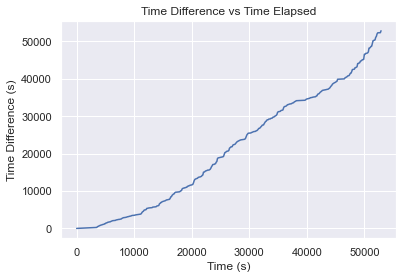

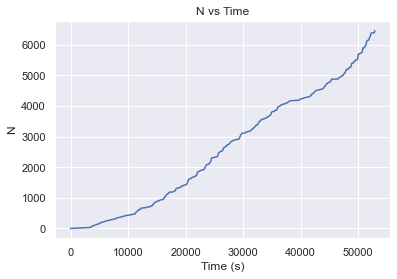

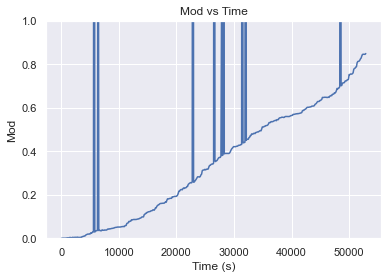

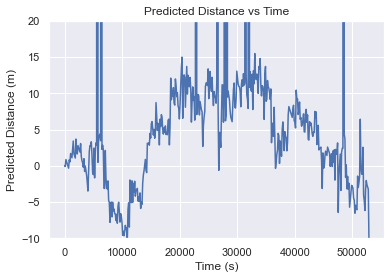

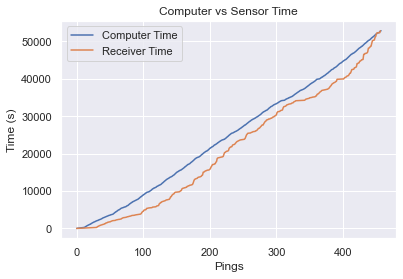

In [131]:
AllFiles = list(os.walk("./Overnight_Test_2/"))
path, LoDir, LoFiles = AllFiles[4]
path2, LoDir, ErrFile = AllFiles[1]
# LoFiles = [LoFiles[2], LoFiles[0], LoFiles[1], LoFiles[3], LoFiles[4]]

# print(AllFiles[1])

time_zero = "2021-07-15 11:18:19.365"
timestamp_0 = datetime.datetime.strptime(time_zero, '%Y-%m-%d %H:%M:%S.%f')

time_diffs = []
distances = []
num_ticks = []
internal_computer_clock = []

for file in LoFiles:
    csv_path = path + "/" + file
    df = pd.read_csv(csv_path, engine='python', header=0, index_col=False)
    # print(df)
    num_ticks.append(len(df["Distance (m)"]))
    distances.append(df["Distance (m)"][0])
   
    for current_datetime in df["Date/Time"]:
        timestamp_x = datetime.datetime.strptime(current_datetime, '%Y-%m-%d %H:%M:%S.%f')
        time_diffs.append((timestamp_x - timestamp_0).total_seconds())

for file in ErrFile:
    calculated_error_data_path = path2 + "/" + file
    #df = pd.read_csv(calculated_error_data_path, engine='python', header=None, index_col=False)
    internal_computer_clock = [0.6678519999999999,8.855636899999999,17.058805300000003,25.2621453,33.4655884,41.8284679,41.908203900000004,50.1115602,58.3151048,66.5183768,74.7216721,82.9250887,91.1126885,99.3161401,101.5981137,107.7589497,114.941092,123.1437739,131.34738819999998,139.5505527,147.7538573,155.9573098,161.2719798,164.4000183,172.588115,180.7913318,188.99426269999998,197.19800519999998,205.4010075,221.8556284,221.93504309999997,230.1231488,246.46526219999998,254.65295779999997,262.8561686,281.36907149999996,341.34619119999996,401.32371919999997,442.9383509,461.3969321,521.4053159,540.7266617,581.54234,597.8300643,641.6949627,701.7365527,745.4291961,761.8896506,778.1744802,822.0262394,867.7325127,882.1788295,908.5953931,941.2767838,965.6794025,1001.4138252,1048.1278732,1061.5357804999999,1072.754676,1121.6883888,1121.7535084,1181.8258214,1241.8337569,1268.2509809,1276.4337089,1302.0347235,1362.0441043,1422.0532418999999,1456.6195901,1481.198225,1489.380286,1541.3508517,1554.5991388,1601.440132,1661.5299649,1677.8303406,1686.0123378,1721.7315236,1741.067619,1751.2792921,1781.8990266,1841.9247998,1857.2027456,1902.0610976,1931.5454395,1961.1747855,2004.8349537,2021.295761,2070.039076,2081.4485395,2089.6152822,2102.8637292,2127.2672522,2141.6986206,2143.806975,2201.8667332,2250.6264124,2262.0210791,2291.4903801,2307.7908905,2321.2150012,2372.9772568,2381.33544,2405.7387997,2413.9208215,2441.5526494,2462.9198099,2501.705987,2536.2573667,2544.4395972,2561.9225348,2622.0278877,2682.1335811,2700.4638712,2741.2318489,2789.9901796999998,2801.3843828999998,2861.443248,2863.5370313,2879.8220236,2904.2254801,2921.7081476,2936.9862863,2969.4922663,2981.8940473,3027.5516651,3041.9825094,3101.9914719,3109.1515449,3133.5549818,3161.1864684,3190.6716376,3221.3395138,3264.0247075,3280.3256362,3281.587732,3304.96855,3341.6934886999998,3379.2970819,3401.8299922,3460.7381703,3461.9851214,3469.1445992,3477.3269885,3501.746378,3521.2744772,3550.7603967,3575.1789346,3581.4917308,3632.2324071,3641.6126364,3656.8905695,3673.1917547,3689.4768292,3701.8940035,3722.2541028,3730.4365518,3762.1430216,3771.3324678,3821.2733246,3828.4330661,3881.395552,3941.3884264,4000.247945,4001.5098368,4061.5522797,4121.5612753000005,4181.5865844,4241.5481758000005,4301.5420825,4303.6354336,4361.598672700001,4421.575884600001,4481.584955300001,4482.671530400001,4541.6426257,4589.3143207,4601.715077700001,4661.725643000001,4721.7029978,4781.728049400001,4841.7042645,4867.0983106,4901.793321200001,4949.465358900001,4957.6322052000005,4961.930953100001,5021.9562555,5031.144700100001,5082.060551500001,5142.069002900001,5202.1266014,5262.1370679,5321.187330600001,5349.648863900001,5366.941288700001,5381.3562029,5424.0258209,5441.509256400001,5464.922117200001,5497.4429264,5501.7419931,5505.8648223,5530.2847222,5546.6011029,5554.7834713,5562.119373,5621.2331288000005,5681.3541979,5693.5960473000005,5709.897471300001,5718.095283000001,5741.6515065,5758.974972800001,5767.1572126,5791.576436900001,5801.9641710000005,5862.086361500001,5922.1435977,5971.924822700001,5981.290229900001,6029.0413764,6041.4428255,6101.4523256,6110.641306400001,6118.8087173,6161.621308700001,6221.6146122,6281.575865500001,6341.616617500001,6401.5776504000005,6461.524501100001,6521.501199400001,6569.187928900001,6581.5732797,6641.5334011,6691.234255400001,6701.6062489000005,6761.566648100001,6821.5432459,6881.5039052,6929.2062188,6937.3728571,6941.671324700001,7001.6470446,7061.640645900001,7121.6178164,7132.820886300001,7181.6899497,7190.895149800001,7241.794639600001,7256.0497781,7288.5386908,7301.946875500001,7353.677731500001,7362.034912200001,7419.821765500001,7422.075504300001,7482.1315167,7542.124451000001,7558.4086826,7601.2060373,7631.6828308,7648.974234800001,7661.374996500001,7697.9244973,7721.447971400001,7746.857717600001,7763.14263,7781.6327062,7841.657413100001,7901.6663089,7961.6752609000005,8016.4411774,8021.7472926,8081.771510400001,8141.764257000001,8201.7409388,8261.702384,8321.694120999999,8381.6545402,8425.2665556,8441.7109275,8499.466620199999,8501.73587,8561.712093,8621.6878979,8681.6494549,8741.640741399999,8801.602047,8842.193529,8861.6746608,8921.635063099999,8981.6432135,9030.3531032,9041.7477465,9101.771990199999,9161.7801644,9186.1350449,9221.8204242,9235.052998199999,9281.9082169,9341.9328871,9401.9726422,9462.0142323,9522.0711314,9522.1515041,9582.1913769,9641.2255191,9660.5460735,9676.8304133,9693.114838,9701.4572521,9709.6235246,9742.1442434,9761.626103499999,9774.873720399999,9783.0560861,9821.809826499999,9881.8338258,9890.0163535,9941.9223846,10001.8992729,10044.5057552,10061.9573564,10102.5169359,10121.9971542,10181.9900433,10241.9658029,10301.9264301,10361.886304399999,10421.8470093,10481.7917138,10541.7508865,10551.946304899999,10601.7910156,10661.769254699999,10691.205627899999,10721.8250396,10772.5160249,10780.697752099999,10781.959847799999,10841.952253899999,10879.5072513,10887.6741373,10902.104404,10962.1124116,10986.4832262,10993.643164,11021.242401599999,11081.266853,11141.2590753,11201.283960699999,11255.0755636,11261.3884693,11279.7021477,11321.4763349,11381.5326317,11402.8683972,11427.270555699999,11441.7009334,11501.7412444,11558.553576999999,11561.8451152,11565.9682616,11607.5829863,11622.014249099999,11672.7689079,11682.118096999999,11742.126563599999,11762.4537542,11801.223716,11861.217879599999,11921.2265878,11981.2509555,12041.2433764,12101.2999067,12161.307807899999,12171.5036441,12221.3483094,12281.3251834,12341.2708666,12401.214896399999,12461.1759888,12522.1738933,12582.102224,12642.0624065,12702.0224207,12735.5016371,12762.0781732,12822.1022519,12882.0947941,12942.0716605,13002.063659899999,13062.0560386,13087.4344245,13122.0965662,13182.0569155,13202.3689774,13242.1134838,13283.7114157,13302.1536937,13332.613685999999,13361.2197294,13406.8920719,13421.3071858,13481.315908499999,13541.339927899999,13601.3649702,13611.5614193,13661.438468999999,13692.937411199999,13717.3242344,13721.622495399999,13766.2891268,13781.7264894,13841.7350338,13847.8723644,13901.823283,13930.2531668,13961.8799759,14021.88747,14081.8798185,14141.8570633,14175.336729999999,14201.912895399999,14257.6552691,14261.9383033,14321.9299142,14381.921364599999,14441.8823359,14501.857546899999,14561.802676399999,14621.7621387,14681.7380918,14741.6984366,14801.6589771,14861.667583299999,14921.6279739,14981.619434299999,15026.2386139,15041.6598079,15067.0540712,15101.7321039,15161.6923869,15172.9101681,15221.780161499999,15281.787643,15341.7969201,15344.9125751,15401.900416499999,15410.0665675,15459.8000056,15462.069088,15522.0937425,15573.839404,15580.998882599999,15582.2615715,15598.5305235,15641.2942833,15672.7614024,15701.3513988,15761.3752172,15802.957229399999,15821.431158399999,15881.3758791,15941.3516355,16001.3116515,16061.288733399999,16089.6874459,16121.3134834,16181.2745652,16241.233446799999,16301.304924099999,16361.2804296,16421.2563325,16481.2480158,16482.319208099998,16541.2880907,16601.2476652,16661.2413233,16721.2171682,16751.676324,16781.2887519,16841.3131685,16901.3523159,16961.3762705,17021.3848015,17081.4084789,17087.5767505,17103.861384,17112.0433276,17141.6563208,17201.6481399,17242.2246828,17261.7056686,17284.0624148,17321.7930929,17381.8009819,17441.8089583,17501.816878499998,17561.8086893,17621.784802899998,17681.7612587,17692.9640154,17741.8007271,17801.7611933,17861.753441099998,17872.956252,17921.810071199998,17981.801057,18041.7770169,18101.7537528,18161.728629,18221.7048523,18281.6807977,18341.6718474,18401.6798729,18461.6734708,18521.6817111,18581.689114099998,18641.6805213,18698.508302899998,18701.7846497,18761.7759899,18821.8159203,18846.2029734,18881.9035564,18887.0339335,18935.7437041,18942.0716011,18992.7945119,19002.1593124,19025.5078908,19041.7936616,19061.2899765,19082.6399637,19121.3457618,19140.6658293,19181.4331737,19238.2131011,19241.4895962,19301.4815734,19361.4727643,19421.4485314,19481.4242461,19541.3998682,19601.359558699998,19661.3365697,19721.327484999998,19781.303387699998,19786.4491762,19841.3585865,19901.3500844,19961.3419689,20021.3339157,20081.357955,20141.3655783,20201.3413684,20253.088064,20261.4301008,20321.470247,20334.7186209,20381.591868299998,20441.5979726,20482.2056256,20501.7015962,20561.757332099998,20620.6311139,20621.8931447,20661.4936002,20681.9975861,20686.1365273,20742.1333629,20801.1821126,20849.893933299998,20861.2877733,20921.311305299998,20981.2874812,21041.264305,21101.3046074,21161.2960729,21221.2726288,21281.2485938,21341.2404751,21401.2012697,21453.906784,21461.2266239,21521.1853882,21582.1837444,21586.30706,21641.2172037,21701.3048607,21761.2962548,21782.6307691,21798.9144804,21821.432068,21855.9497107,21881.503052199998,21941.5120213,22001.5039458,22061.4809492,22121.4566457,22181.4646999,22241.440762,22256.7026347,22301.5290169,22361.5208854,22370.7095757,22420.3938347,22421.6559796,22461.2240575,22481.711806299998,22541.7366297,22601.7284063,22661.7209425,22682.0326356,22721.7612427,22781.7367979,22841.6965176,22901.6411315,22910.8140827,22961.664738299998,23021.6242805,23081.5848464,23099.866952,23141.6082186,23201.5685021,23238.0545366,23261.5783717,23321.5534031,23335.7922139,23381.5772573,23416.0947386,23441.631854799998,23501.6401524,23549.3259345,23561.7435588,23606.4088802,23621.846732899998,23663.4763462,23679.760566099998,23682.0303237,23720.6076634,23742.1340732,23745.2346623,23793.9758853,23801.3114396,23802.3975943,23859.242121299998,23861.511082,23921.48658,23981.4947415,24041.5026272,24080.095838999998,24101.6062644,24161.6306885,24221.6221689,24281.6140711,24341.6539929,24401.6463779,24461.623863099998,24498.1402654,24521.6645078,24581.640561,24641.6004083,24701.5757954,24761.5364745,24821.4799129,24881.4398376,24941.4012156,24988.0324888,25001.4402519,25061.4008491,25121.3615732,25181.3210667,25234.040687599998,25241.3759735,25301.3677863,25361.3596981,25421.3199543,25438.5955537,25454.8794342,25479.2660004,25481.53561,25503.8925666,25512.0590324,25541.6711863,25601.663689,25634.1539296,25661.736954199998,25692.1801594,25721.8079279,25781.8318734,25789.9985678,25841.8880841,25863.238319199998,25888.6320438,25902.0396962,25912.2354299,25945.7316149,25962.1914677,26021.1931259,26081.200498,26108.6239789,26141.288072299998,26142.374761299998,26201.391923299998,26261.4339625,26304.070716,26321.5376873,26381.4981093,26441.5052832,26501.4810646,26509.647796999998,26561.5209856,26621.480798,26681.4562192,26741.4157866,26746.5461579,26762.8145323,26801.5191642,26861.4964098,26918.2448818,26921.536114,26981.496163,27041.4716568,27101.4475179,27152.122806,27161.4869312,27221.4630118,27281.438385999998,27319.9996324,27341.5096189,27401.5170735,27461.5106881,27521.4860033,27581.478711,27581.5581172,27641.581878099998,27646.7122237,27654.893870699998,27701.7337406,27761.7263948,27821.734765,27881.7585183,27941.7822748,28001.7745537,28031.2123841,28061.8156932,28121.7920167,28181.7836148,28241.7440248,28301.719614499998,28325.0673742,28361.7593728,28421.7346457,28481.7106681,28541.6867211,28579.2103223,28601.7264394,28661.6886691,28668.8473687,28721.7279671,28781.7197089,28841.6960595,28901.6719861,28955.4303783,28961.7589533,29021.750687,29037.0121189,29053.280411,29081.8863017,29141.9101687,29201.9341116,29233.4014761,29257.7884075,29262.0714327,29266.1947798,29321.1844185,29381.1926977,29405.5797937,29441.2970402,29454.5452803,29495.153123,29501.4807485,29561.5043531,29621.495695999998,29681.5197233,29716.054135,29741.639499,29756.9168679,29801.7437053,29838.2932668,29861.8165628,29921.8242278,29981.8170881,30002.1438857,30041.872436499998,30100.6655804,30101.912097,30161.9039465,30206.5223391,30221.9593435,30281.918690399998,30341.878405,30401.8543651,30435.3359026,30461.8962028,30521.8566747,30581.8315668,30641.8075902,30701.7828266,30761.7740986,30821.7662389,30881.7738055,30941.781484299998,31001.821473,31007.9735963,31061.895344,31121.9194334,31179.7693935,31182.038224199998,31212.513243499998,31242.1268216,31261.4467578,31286.8718783,31301.318589,31361.3427443,31421.3662812,31481.3429101,31490.5475901,31541.4467311,31548.6062877,31601.5025799,31613.7278177,31654.3207447,31661.6405554,31721.647437,31781.6397914,31841.615962,31901.5925283,31961.5838203,32021.5598754,32081.5356187,32141.4957847,32201.4867843,32218.762398,32261.5278747,32321.5035346,32381.4642646,32441.4711649,32501.4623872,32546.0806887,32561.5176574,32586.8951829,32621.573231,32635.8282803,32681.6449167,32726.2798363,32741.7328017,32801.7410421,32861.765713400004,32914.534630500006,32921.8697792,32981.924531000004,33041.917130300004,33077.4579471,33093.726583300006,33102.068033200005,33162.1079412,33183.4584475,33221.2049053,33249.634285,33265.9186637,33281.356306300004,33314.884366900005,33339.28737490001,33341.5567632,33401.6277596,33461.6847561,33495.1963152,33521.7724602,33552.2161397,33581.8291035,33593.0471257,33641.9001377,33701.8597376,33761.835657400006,33813.549475600004,33821.891377,33881.8832272,33904.224656900005,33941.922608,33985.5345162,34001.9786163,34061.9555868,34121.915862600006,34133.134131700004,34141.332037600005,34157.6482774,34165.846121400005,34174.028585,34181.3796059,34182.4663204,34197.75973780001,34205.94197280001,34214.1398436,34222.3378776,34230.535789500005,34238.7340934,34242.025837500005,34247.171598600005,34255.354055100004,34302.177960600005,34361.1940516,34362.2806435,34421.2975223,34481.3373149,34541.393054,34542.46396550001,34583.102497500004,34601.577098300004,34648.2892576,34661.7131222,34705.387881500006,34721.83268000001,34738.116099800005,34778.7391653,34782.031154100005,34842.103396700004,34902.127202200005,34918.4116795,34942.830326200004,34951.012482100006,34961.384665100006,35016.229765300006,35021.535567700004,35081.575011,35089.7727699,35122.277643500005,35141.7749274,35155.023108500005,35179.425895700006,35195.7265044,35202.054014600006,35262.0800714,35322.103786,35382.127615100006,35384.2209957,35424.812439,35441.2719164,35501.311948500006,35561.30336210001,35621.278652,35681.2700895,35741.2313032,35801.222004400006,35833.696339500006,35861.2785672,35921.254872900005,35940.5591921,35981.3091099,35989.4921037,36041.381143800005,36101.356428600004,36161.348406200006,36201.9079824,36221.3883174,36281.3643525,36341.355527700005,36401.33108230001,36414.5632847,36461.388416600006,36521.3488454,36537.6325375,36581.4357716,36641.4282402,36667.8441153,36701.5006129,36761.4912323,36821.5150853,36881.538307,36881.6028175,36914.107715900005,36930.4240538,36941.8189662,36995.6737778,37002.0026071,37044.688859500005,37062.1876819,37069.347276500004,37109.9553815,37121.3651198,37150.8498945,37181.533336700006,37216.0836914,37232.3685159,37241.733252900005,37301.7251332,37361.700114800005,37396.2023112,37421.755885000006,37481.779745,37502.091822500006,37541.8358939,37601.812044900005,37661.7574323,37721.7176381,37764.3061431,37781.741704600005,37841.716718,37901.6768755,37961.6364667,38017.3774837,38021.675794400006,38081.620163600004,38141.57904030001,38173.013525300004,38201.602872100004,38261.563849800004,38321.5236077,38381.4982182,38441.4898944,38492.1813152,38501.545482300004,38561.489790800006,38621.496962000005,38681.489042400004,38688.663877900006,38741.560188400006,38778.076350400006,38801.615497900006,38861.576724800005,38921.5522351,38925.660011,38981.623934400006,38990.8124123,39041.695552200006,39089.350448100005,39101.7358126,39161.7271304,39221.6719449,39245.03603240001,39281.695119300006,39326.3301483,39341.7515701,39401.7433016,39461.7364057,39521.7285949,39581.689246,39641.649132000006,39701.6245588,39761.5683097,39821.512795,39866.1465953,39874.344946000005,39881.6959787,39882.782601800005,39890.981998200004,39899.1786899,39907.363828400004,39915.5598001,39923.757802600005,39931.940210400004,39941.305323500004,39956.567177200006,39964.733737,40001.4566464,40061.4657432,40121.489201100005,40181.5289481,40226.179060400005,40241.6316794,40301.624182700005,40349.2944759,40361.695769000005,40421.656555500005,40422.7427075,40481.6951235,40537.5003192,40541.798831700005,40601.8388303,40661.89605620001,40721.8873231,40741.208311300004,40781.9751906,40799.2664239,40839.8729937,40842.12705910001,40902.10224850001,40962.1263458,41022.134154600004,41082.0935277,41117.602976300004,41142.1494373,41202.141941400005,41262.1660895,41322.174054300005,41382.1179281,41442.078324300004,41461.398251000006,41477.666547500005,41501.190301400005,41562.17294800001,41622.1327782,41682.0772669,41742.052912800005,41802.0280405,41861.9892216,41878.257622100005,41922.0282966,41981.9725083,42041.947708,42101.922150800005,42161.881929300005,42221.8731099,42281.849283100004,42341.8717495,42401.8317659,42442.408062500006,42461.872666400006,42500.418546,42516.7024106,42522.007814200006,42541.3129647,42582.0479072,42642.0550937,42702.062729900004,42762.022835100004,42822.045718600006,42882.0215534,42942.013640200006,42942.093261,42985.7210846,43002.164991800004,43062.1744076,43088.590171100004,43121.2393793,43181.230745600005,43187.3833373,43241.286803,43301.309950300005,43361.2700167,43421.213883200006,43481.204981400006,43542.171193400005,43602.11570440001,43662.092525600005,43722.051757,43782.01145300001,43841.9712632,43901.9318013,43961.8907449,44021.865922200006,44054.3386727,44081.921774,44087.067230700006,44142.0250861,44202.0643212,44217.3263539,44250.8547458,44261.2267833,44321.250220400005,44381.257306600004,44441.248550100005,44501.303633200005,44561.3432383,44621.351455300006,44681.3266468,44700.6470962,44741.414429000004,44757.683339200004,44801.5020003,44861.5112405,44887.9115629,44921.5836606,44981.590763800006,45041.614343600006,45101.622925400006,45101.702354600005,45108.861659300004,45161.741510800006,45166.8871602,45221.8140347,45281.8043922,45341.749489500005,45401.725042900005,45461.6857526,45521.645613,45581.6050215,45641.564888400004,45701.5241255,45761.4832181,45821.4427739,45881.4022217,45941.3779301,46001.3536508,46061.314506200004,46121.289370800005,46181.233208100006,46242.1998198,46302.175615500004,46362.150136300006,46422.1266189,46482.1184507,46532.857710300006,46541.1995017,46541.264030000006,46601.2871318,46661.263795000006,46721.2082075,46778.0026335,46781.27887540001,46786.4240872,46835.117286,46841.4304112,46901.453737300006,46924.8024592,46961.5095957,47021.51704770001,47081.52391900001,47141.5001882,47179.0387675,47201.5403797,47261.486024000005,47321.4619819,47381.405438400005,47441.3661364,47501.3255673,47561.2853675,47621.230078600005,47682.196357700006,47742.1887375,47802.16444460001,47862.141652800005,47922.101035800006,47982.044592800004,48041.988181600005,48101.9481448,48161.8916084,48184.2168618,48217.695547,48221.9790651,48281.954542900006,48341.94632720001,48380.4761823,48401.9859957,48461.963096900006,48521.9552477,48581.946453000004,48641.95366190001,48643.0247841,48699.8354858,48702.104662000005,48762.1119419,48822.0870462,48882.078540200004,48942.054995800005,49002.0460134,49062.039347000005,49122.0313726,49181.991635800005,49241.9681213,49301.9432966,49361.902790600005,49421.8475506,49481.7910196,49484.9065132,49541.8460159,49601.7737357,49661.734531400005,49721.6783766,49781.6221238,49841.5491246,49901.493082500005,49961.42112480001,50021.3639367,50081.292433,50141.2358064,50147.3884649,50201.2593265,50253.96448440001,50261.2995593,50294.7798515,50321.3392497,50381.2826823,50392.516840200005,50441.338110100005,50501.314323000006,50561.2899943,50621.250391600006,50681.225283,50742.191734,50802.15175410001,50862.111915,50922.072563600006,50982.0477923,51042.022376600005,51055.254220500006,51102.045571,51161.9889109,51221.964139200005,51281.92400770001,51317.464677100004,51342.011501,51401.9863945,51461.963753300006,51521.9550362,51581.9302781,51641.8893552,51701.849649,51761.8246334,51821.7844142,51881.7750526,51941.7500593,51954.9819823,52001.7887762,52061.766747400005,52121.75736810001,52181.7485431,52241.739516600006,52274.2287126,52282.4111311,52298.726724600005,52302.019120900004,52307.1643112,52315.3624577,52361.227119300005,52421.234815200005,52481.225774700004,52541.249598500006,52601.2561539,52661.2493626,52721.2718535,52781.2471066,52829.9402559,52841.3191297]
    # print(internal_computer_clock)

distances.append(52901)
x_plot = []
n_plot = []

for i in range(0, len(distances)-1):
    x_plot.append(np.linspace(distances[i], distances[i+1], num_ticks[i]))
    
n2_plot = [i for i in range(457)]
    
n_plot.append(np.linspace(0, 457, 1338))
    
x_plot = np.concatenate(x_plot)
n_plot = np.concatenate(n_plot)
# print(n_plot)

plt.plot(x_plot, time_diffs) 
plt.title("Time Difference vs Time Elapsed")
plt.xlabel("Time (s)")
plt.ylabel("Time Difference (s)")
plt.show()

N = [i/8.17907142857143 for i in time_diffs]
m = [i%8.17907142857143 for i in time_diffs]

value_list = []

for value in m:
    if value < 8:
        value_list.append(value)
    else:
        value_list.append(8.17907142857143 - value)


m = value_list


multiplied = [i * 1460 for i in m]


plt.plot(x_plot, N) 
plt.title("N vs Time")
plt.xlabel("Time (s)")
plt.ylabel("N")
plt.show()

plt.plot(x_plot, m) 
plt.title("Mod vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Mod")
#plt.xlim([0,10])
plt.ylim([0,1])
plt.show()

predicted_dist_per_sec = 0.02367587849280499

time_diffs_changed = [i * predicted_dist_per_sec for i in time_diffs]
z = [a - b for a, b in zip(multiplied, time_diffs_changed)]

plt.plot(x_plot, z) 
plt.title("Predicted Distance vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Predicted Distance (m)")
#plt.xlim([0,1])
plt.ylim([-10,20])
plt.show()


# print(internal_computer_clock)
# print(num_ticks)
plt.plot(n_plot, internal_computer_clock, label = "Computer Time") 
plt.title("Computer vs Sensor Time")
plt.xlabel("Pings")
plt.ylabel("Time (s)")
plt.plot(n2_plot, time_diffs, label = "Receiver Time")
plt.xlabel("Pings")
plt.legend()
#plt.xlim([0,5])
plt.show()

# predicted_dist_per_ping = multiplied[-1] / len(m)
# print("The predicted dist per ping is: ", predicted_dist_per_ping)

# predicted_dist_per_sec = multiplied[-1] / 58367
# print("The predicted dist per ping is: ", predicted_dist_per_sec)

In [125]:
with open("data_test" + ".csv", "w") as f:
    writer = csv.writer(f)
    for i in range(1000):
        row = [i]
        print("HeERE")
        writer.writerow(row)
        time.sleep(0.1)

HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE
HeERE


KeyboardInterrupt: 